A ideia é te deixar bem livre para criar as combinações e fazer as análises que quiser, desde que você consiga responder:

- Qual nosso melhor canal de aquisição?
- Existe algum padrão de comportamento em algum grupo de leitores?
- Quais medidas podemos tomar como empresa, com base nos dados analisados por você.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_json('DataSetTheNews.json')

### Visão geral do dataset:

In [3]:
df.head()

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
0,Chaddy,Smithe,csmithe0@census.gov,24/01/2022,23/09/2021,0.88,the news,GoogleAds
1,Shir,Halloran,shalloran1@narod.ru,10/07/2021,02/01/2022,0.02,the bizness,Referral
2,Gusti,Schwanden,gschwanden2@feedburner.com,01/05/2022,04/08/2021,0.81,the champs,Referral
3,Ted,Kettles,tkettles3@noaa.gov,15/05/2022,15/03/2022,0.20,the bizness,Referral
4,Virginia,Glencorse,vglencorse4@redcross.org,26/06/2022,22/02/2022,0.99,the news,Referral


In [4]:
df['Entry Channel'].unique()

array(['GoogleAds', 'Referral', 'Organic', None, 'Insta', 'Influencer',
       'Facebook'], dtype=object)

In [5]:
df['Newsletter'].unique()

array(['the news', 'the bizness', 'the champs', None, 'the stories'],
      dtype=object)

- Canais de Aquisição: GoogleAds | Referral | Organic | Instagram | Influencer | Facebook
- Canais de notícias: the news | the biziness | the champs | the stories

In [6]:
df['Open Rate'].describe()

count    939.000000
mean       0.503078
std        0.281961
min        0.010000
25%        0.270000
50%        0.500000
75%        0.740000
max        1.000000
Name: Open Rate, dtype: float64

- frequência média dos leitores: 50%

### Preparação de dados:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     973 non-null    object 
 1   last_name      939 non-null    object 
 2   email          973 non-null    object 
 3   Entry Date     939 non-null    object 
 4   Last Opened    939 non-null    object 
 5   Open Rate      939 non-null    float64
 6   Newsletter     939 non-null    object 
 7   Entry Channel  939 non-null    object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [27]:
df['Entry Date'] = pd.to_datetime(df['Entry Date'])
df['Last Opened'] = pd.to_datetime(df['Last Opened'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   first_name     973 non-null    object        
 1   last_name      939 non-null    object        
 2   email          973 non-null    object        
 3   Entry Date     939 non-null    datetime64[ns]
 4   Last Opened    939 non-null    datetime64[ns]
 5   Open Rate      939 non-null    float64       
 6   Newsletter     939 non-null    object        
 7   Entry Channel  939 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 62.6+ KB


### Missing Data:

In [10]:
df['Open Rate'].fillna(value=df['Open Rate'].median(), inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

first_name       0
last_name        0
email            0
Entry Date       0
Last Opened      0
Open Rate        0
Newsletter       0
Entry Channel    0
dtype: int64

### Insights importantes:

Text(0, 0.5, 'Open Rate')

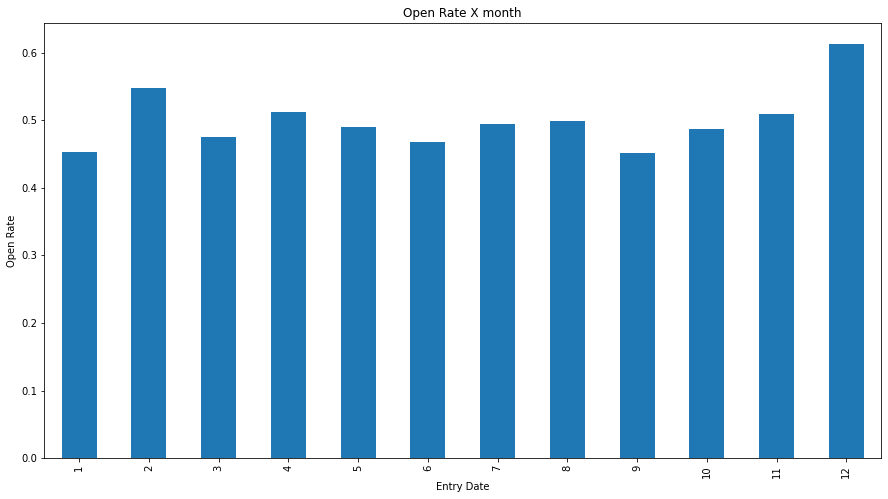

In [13]:
plt.figure(figsize=(15,8))
df21 = df.loc[(df['Entry Date'] >= '2021-01-01') & (df['Entry Date'] > '2022-01-01')]
df21.groupby(df21['Entry Date'].dt.month)["Open Rate"].mean().plot.bar()
plt.title('Open Rate X month')
plt.xlabel('Entry Date')
plt.ylabel('Open Rate')

Text(0, 0.5, 'Open Rate')

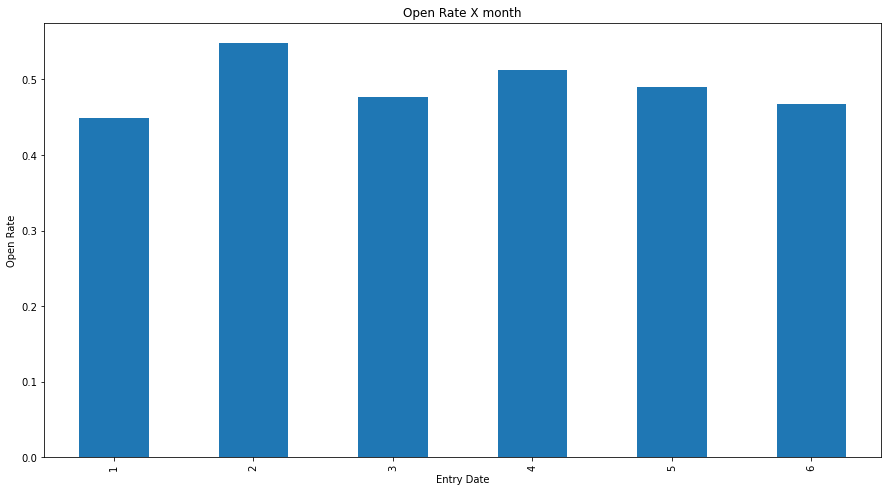

In [14]:
plt.figure(figsize=(15,8))
df22 = df.loc[(df['Entry Date'] >= '2022-01-01') & (df['Entry Date'] <= '2022-06-30')]
df22.groupby(df22['Entry Date'].dt.month)["Open Rate"].mean().plot.bar()
plt.title('Open Rate X month')
plt.xlabel('Entry Date')
plt.ylabel('Open Rate')

- Percebe-se que, baseado nos dados acima, a taxa de abertura dos emails tem pouca variância entre 0.4 e 0.6 tendo seu maior desempenho no final de 2021

Text(0, 0.5, 'Open Rate')

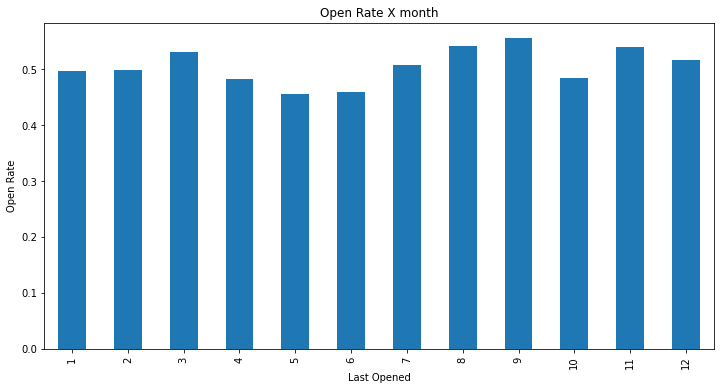

In [15]:
plt.figure(figsize=(12,6))
dfLO21 = df.loc[(df['Last Opened'] >= '2021-01-01') & (df['Last Opened'] >= '2022-01-01')]
dfLO21.groupby(dfLO21['Entry Date'].dt.month)["Open Rate"].mean().plot.bar()
plt.title('Open Rate X month')
plt.xlabel('Last Opened')
plt.ylabel('Open Rate')

Text(0, 0.5, 'Open Rate')

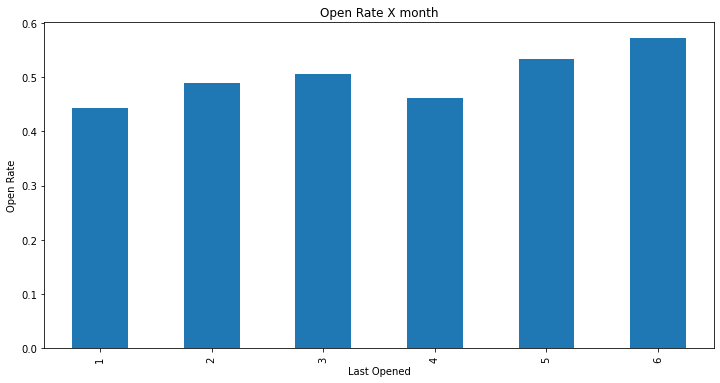

In [16]:
plt.figure(figsize=(12,6))
dfLO22 = df.loc[(df['Last Opened'] >= '2022-01-01') & (df['Last Opened'] <= '2022-06-30')]
dfLO22.groupby(dfLO22['Last Opened'].dt.month)["Open Rate"].mean().plot.bar()
plt.title('Open Rate X month')
plt.xlabel('Last Opened')
plt.ylabel('Open Rate')

- Maior taxa de abertura com base na ultima vez que os leitores viram as _news_ foi mais recente, em junho, o que indica um crescimento na retenção.

In [17]:
#Casos em que o leitor abriu pela última vez antes da data de entrada
df['LastOpened_bf_Entry'] = df['Last Opened'] < df['Entry Date']
df['LastOpened_bf_Entry'].value_counts(normalize=True)

True     0.523497
False    0.476503
Name: LastOpened_bf_Entry, dtype: float64

- De acordo com os dados acima, aproximadamente 52% dos leitores viram as notícias antes de se inscrever, e não chegaram a ver depois que as _news_ começaram a chegar diariamente. 

In [18]:
# pd.set_option('mode.chained_assignment', None)
# df_dias = df[df['LastOpened_bf_Entry']==False]
# df_dias['qte_dias'] = df_dias['Last Opened'] - df_dias['Entry Date']
# df_dias

In [19]:
df[(df['Last Opened'] >='2022-06-01') & (df['Last Opened'] <= '2022-06-30')].shape

(52, 9)

- Dos 1000 leitores, somente 52 abriram as noticias no mês de junho, somente 5,20% do total de possíveis leitores.

In [20]:
df[(df['Last Opened'] >='2022-06-01') & (df['Last Opened'] <= '2022-06-30') & (df['Entry Date'] <= '2022-01-01')].shape

(22, 9)

- Dos 52 leitores que abriram em junho, 22 se inscreveram em 2021, o que mostra uma taxa de retenção de menos de 43% no período de 6 meses.

Text(0, 0.5, 'Open Rate')

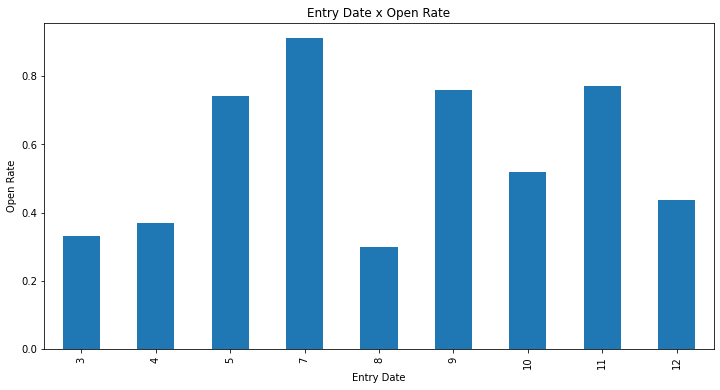

In [21]:
#Abriram em junho, porém se inscreveram em 2021
plt.figure(figsize=(12,6))
dfLOjun = df.loc[(df['Last Opened'] >= '2022-06-01') & (df['Last Opened'] <= '2022-06-30') & (df['Entry Date'] <= '2022-01-01')]
dfLOjun.groupby(dfLOjun['Entry Date'].dt.month)["Open Rate"].mean().plot.bar()
plt.title('Entry Date x Open Rate')
plt.xlabel('Entry Date')
plt.ylabel('Open Rate')

- Observando os dados, encontramos leitores com a entrada em julho de 2021 e que abriram as _news_ em junho de 2022 consequentemente com uma taxa alta de abertura
- Alguns meses que também se destacam de lá pra cá são maio, setembro e novembro
- Também percebe-se que muitos leitores se inscreveram, passaram muito tempo inativos, e recentemente voltaram a abrir as _news_

In [22]:
df['Entry Channel'].value_counts()

Facebook      166
Referral      158
GoogleAds     155
Influencer    153
Organic       152
Insta         131
Name: Entry Channel, dtype: int64

In [23]:
plt.figure(figsize=(5,5))
label = df['Entry Channel'].value_counts().index
label_count = df['Entry Channel'].value_counts().values
fig = px.pie(df, values=label_count, names=label, title='Canais de entrada')
fig.show()

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Leitores')

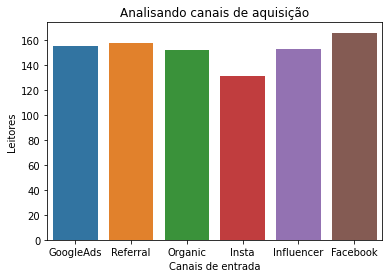

In [24]:
sns.countplot(x=df['Entry Channel'], data=df)
plt.title('Analisando canais de aquisição')
plt.xlabel('Canais de entrada')
plt.ylabel('Leitores')

Baseado nos gráficos acima, o método de divulgação com mais resultados é o Facebook, seguido pelo método de referências, o que indica que os sorteios estão tendo resultados diretos na frequência do público com o Dênius.

<AxesSubplot:xlabel='Newsletter', ylabel='Open Rate'>

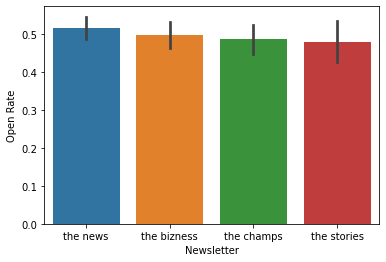

In [25]:
sns.barplot(x=df['Newsletter'], y=df['Open Rate'], data=df)

De acordo com o gráfico acima a taxa de leitura do "the news" é levemente maior entre os leitores, seguido pelo "the biziness", "the champs" e finalmente o "the stories", chegando em media a 50%

<AxesSubplot:xlabel='Newsletter', ylabel='Open Rate'>

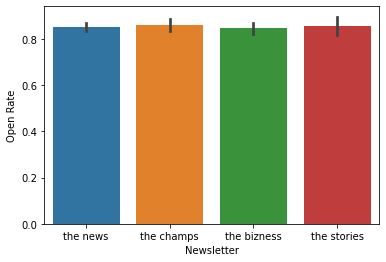

In [26]:
df1 = df[df['Open Rate'] > 0.7]
sns.barplot(x=df1['Newsletter'], y=df1['Open Rate'], data=df1)

Entre as taxas de abertura com maior frequência (mais que 70%), os canais de Newsletter estão bem equilibrados.

Testezin